# <center>Universidad de Las Américas</center>
## <center>Maestría en Inteligencia de Negocios y Ciencia de Datos</center>

![](http://fback.com.ec/wp1/wp-content/uploads/2014/03/udla1.png)

## ANALÍTICA PREDICTIVA

**Tarea semana 4:** Caso práctico BDD Final. 
    
**Integrantes:** Andrés Pantoja - Willy Lema
    
**Fecha:** 25 de Diciembre de 2022
    

###### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


## Caso práctico: BDD Final

Modelar a su preferencia (pero justificado datos de la cadena de supermercados de EEUU, Walmart. 

La base con la que trabajaremos este caso  práctico contiene información sobre datos históricos de las ventas de Walmart desde 2010-02-05 hasta 2012-11-01, en el archivo WalmartStoresales. Dentro de este archivo encontrará los siguientes campos:

 - Tienda-el número de la tienda.
 - Fecha-la semana de ventas
 - Weekly_Sales - ventas para la tienda dada.
 - Holiday_Flag: si la semana es una semana especial de vacaciones 1 – Semana de vacaciones 0 – Semana no festiva.
 - Temperatura - Temperatura el día de la venta.
 - Fuel_price -costo del combustible en la región. 
 - IPC-índice de precios al consumidor vigente. 
 - Desempleo - tasa de desempleo predominante. 
 - Eventos festivos.
 - Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\ 
 - Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\
 - Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\
 - Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13
 
La base de datos también la puede descargar en Kaggle</p>

### Instrucciones:

- Importe la base de datos a una base en Jupyter Notebook con pandas. 
- Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención? 
- Evalúe si la base contiene datos perdidos.
- Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 
- Grafique las distribuciones de las variables y a priori comente sobre ellas. 
- Obtenga las correlaciones entre los datos de corte numérico. 
- Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.
- Indique que tipo de modelación realizarán y porqué. 
- Verifique los supuestos, de haber escogido el enfoque econométrico. 
- Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.
- Grafique a los valores predicho de modelo vs los valores reales.
- ¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta. 
- Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo. 
- Suba su proyecto final en su cuenta de Github y adjunte una captura de pantalla en esta plataforma. 

###### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

**1. Importe la base de datos a una base en Jupyter Notebook con pandas.**

En el presente script, trabajaremos con los datos históricos de ventas de Walmart, por lo que se procede a importar la base de datos con la ayuda del módulo Pandas:

Importamos los módulos requeridos:

In [690]:
# Importar librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Llamemos al module
import pandas_datareader as pdr

# import datetime
import datetime as dt

import scipy.stats as st
from scipy.stats import norm
from scipy.stats import expon
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip






In [691]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


#### Recodificar el nombre de las columnas a español

Se recodifica el nombre de las variables al idioma español para mayor entendimiento y concordancia con la metodología del ejercicio.

In [692]:
df.rename({'Store':'Tienda', 'Date': 'Fecha', 'Weekly_Sales':'Ventas_Semana', 
           'Holiday_Flag': 'Bandera_Vacaciones', 'Temperature': 'Temperatura', 'Fuel_Price': 'precio_combustible', 'CPI':'IPC', 'Unemployment':'Desempleo'}, axis=1, inplace=True)

In [693]:
df

,Tienda,Fecha,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


La base de datos "Walmart" se importa de manera local, esta contiene 8 variables, de las cuales todas son del tipo numérico. Esta base contiene 6,435 registros.

**2. Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?**

#### Cargando los datos

In [694]:
# Visualicemos la información en nuestro entorno de trabajo
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tienda              6435 non-null   int64  
 1   Fecha               6435 non-null   object 
 2   Ventas_Semana       6435 non-null   float64
 3   Bandera_Vacaciones  6435 non-null   int64  
 4   Temperatura         6435 non-null   float64
 5   precio_combustible  6435 non-null   float64
 6   IPC                 6435 non-null   float64
 7   Desempleo           6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


La variable Fecha tiene un formato Object, se procede a cambiar a date-time para mejor entendimiento:

In [695]:
# Se convierte la variable Fecha a tipo date-time
df['Fecha'] = pd.to_datetime(df.Fecha)

In [696]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Tienda              6435 non-null   int64         
 1   Fecha               6435 non-null   datetime64[ns]
 2   Ventas_Semana       6435 non-null   float64       
 3   Bandera_Vacaciones  6435 non-null   int64         
 4   Temperatura         6435 non-null   float64       
 5   precio_combustible  6435 non-null   float64       
 6   IPC                 6435 non-null   float64       
 7   Desempleo           6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


Se puede observar la data del histórico de ventas de Walmart desde el 05 de febrero del 2010 hasta el 01 de noviembre de 2012, por lo que tenemos un total de 6435 observaciones sin valores perdidos.

Las variables Tienda y Bandera_Vacaciones son de tipo Discretas, la variable Fecha tiene formato de Fecha y el resto de variables son de tipo continuas.

- Se evidencia que en el conteo de las variables analizadas hay un total de 6.345 registros y no presentan registros en blanco.
- No se evidencia una dispersión considerable de los datos para cada una de sus variables.

In [697]:
df.describe()

,Tienda,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


- Se evidencia que en el conteo de las variables analizadas, todas presentan el mismo número de registros que es 6,435
- Se comprueba que no existen registros vacíos.
- En la variable "Ventas_semanal" la media es mayor a la mediana, esto significa que la distribución está sesgada a la derecha.
- Se verifica que para la variable "Temperatura" la mediana es mayor que la media por lo que la distribución está sesgada a la izquierda.
- Se puede observar de los valores que la variable "Precio_combustible", la media es ligeramente mayor que la media por que la distribución se encuentra sesgada a la izquierda.
- Para la variable "Indice_precios_al_consumidor", la mediana es mayor a la media por lo que la distribución se encuentra sesgada a la izquierda.
- De la variable "Tasa_desempleo" se puede observar que el valor de la media es superior a la mediana por lo que la distribución está sezgada a la derecha. Así mismo en el tercer quartil se tiene un valor de 8.62, lo que indica que el porcentaje de desempleo llega a la un nivel mayor a la media (8.00) en gran parte de este periodo de tiempo analizado.

**3. Evalúe si la base contiene datos perdidos.**

Dando seguimiento al conteo de los registros de las variables y sus diferencias; se realiza un análisis de datos perdidos, evidenciando que la base de datos no presenta datos perdidos.

In [698]:
df.isna().sum()

Tienda                0
Fecha                 0
Ventas_Semana         0
Bandera_Vacaciones    0
Temperatura           0
precio_combustible    0
IPC                   0
Desempleo             0
dtype: int64

Adicionalmente, se verifica que la base de datos no contiene valores duplicados, por lo que no es necesario proceder a eliminar esos registros, quedando un total de 6.435 registros:

**4. Evalúe si alguna de las variables contiene datos atípicos (outliers). De ser el caso detalle cuáles y qué método estadístico aplicaran para corregir.**


De la gráfica de boxplot, se puede ver que las variables donde se requiere el tratamiento de valores extremos es en "Ventas_Semana" y "Desempleo".

Para el resto de variables no se presentan suficientes datos extremos y su distancia de la media no es tan extrema como en el de las variables anteriores.

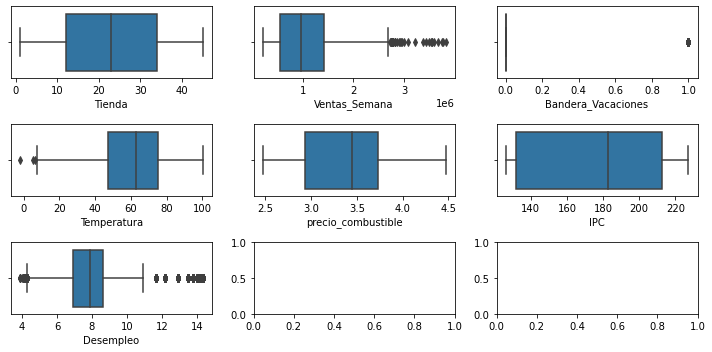

In [699]:
# Box plots
fig, axs = plt.subplots(3,3, figsize = (10,5))
plt1 = sns.boxplot(df['Tienda'], ax = axs[0,0])
plt2 = sns.boxplot(df['Ventas_Semana'], ax = axs[0,1])
plt3 = sns.boxplot(df['Bandera_Vacaciones'], ax = axs[0,2])
plt4 = sns.boxplot(df['Temperatura'], ax = axs[1,0]),
plt5 = sns.boxplot(df['precio_combustible'], ax = axs[1,1]),
plt6 = sns.boxplot(df['IPC'], ax = axs[1,2]),
plt7 = sns.boxplot(df['Desempleo'], ax = axs[2,0])

plt.tight_layout()

El método con el que se trabaja es con la diferencia de los rangos intercuartiles IQR, que se detalla a continuación para las variables Ventas_Semana y Desempleo:

**Variable Ventas_Semana**

Se calcula el Quartil 1 y 3 para estimar los límites de los datos atípicos y obtener los rangos Intercuartiles:

In [700]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_Ventas_Semana = df.Ventas_Semana.quantile(0.25)
Q3_Ventas_Semana = df.Ventas_Semana.quantile(0.75)
IQR_Ventas_Semana = Q3_Ventas_Semana - Q1_Ventas_Semana  #rango intercuartil
print(IQR_Ventas_Semana)

866808.5549999999


En el sigiuente gráfico se observa que los datos de la variable Ventas_Semana tiene un sesgo positivo.

<AxesSubplot:xlabel='Ventas_Semana', ylabel='Density'>

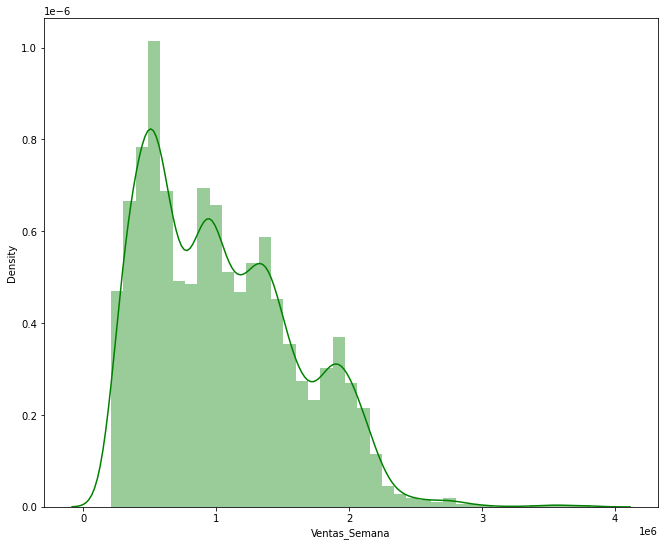

In [701]:
sns.distplot(df['Ventas_Semana'],color="green")

Se procede a remover las observaciones que se encuentran por fuera del rango 1.5 x IQR:

In [702]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Ventas_Semana'] < (Q1_Ventas_Semana - 1.5 * IQR_Ventas_Semana)) |(df['Ventas_Semana'] > (Q3_Ventas_Semana + 1.5 * IQR_Ventas_Semana)))]
df.shape

(6401, 8)

**Variable Desempleo**

Se calcula el Quartil 1 y 3 para estimar los límites de los datos atípicos y obtener los rangos Intercuartiles:

In [703]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1_Desempleo = df.Desempleo.quantile(0.25)
Q3_Desempleo = df.Desempleo.quantile(0.75)
IQR_Desempleo = Q3_Desempleo - Q1_Desempleo  #rango intercuartil
print(IQR_Desempleo)

1.7309999999999999


En el sigiuente gráfico se observa que los datos de la variable Desempleo tiene un sesgo positivo.

<AxesSubplot:xlabel='Desempleo', ylabel='Density'>

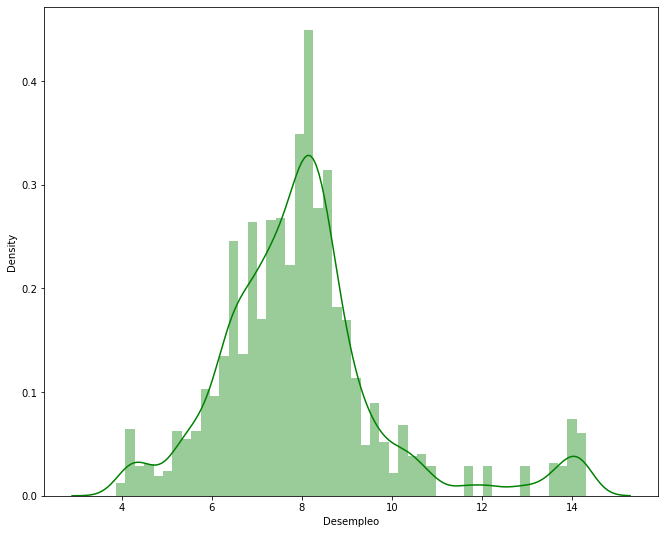

In [704]:
sns.distplot(df['Desempleo'],color="green")

Se procede a remover las observaciones que se encuentran por fuera del rango 1.5 x IQR:

In [705]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['Desempleo'] < (Q1_Desempleo - 1.5 * IQR_Desempleo)) |(df['Desempleo'] > (Q3_Desempleo + 1.5 * IQR_Desempleo)))]
df.shape

(5920, 8)

En los gráficos siguientes se puede apreciar que los datos atípicos se excluyen del análisis:

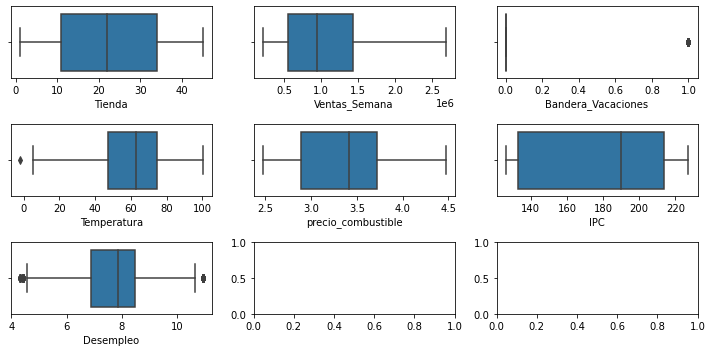

In [706]:
# Box plots
fig, axs = plt.subplots(3,3, figsize = (10,5))
plt1 = sns.boxplot(df['Tienda'], ax = axs[0,0])
plt2 = sns.boxplot(df['Ventas_Semana'], ax = axs[0,1])
plt3 = sns.boxplot(df['Bandera_Vacaciones'], ax = axs[0,2])
plt4 = sns.boxplot(df['Temperatura'], ax = axs[1,0]),
plt5 = sns.boxplot(df['precio_combustible'], ax = axs[1,1]),
plt6 = sns.boxplot(df['IPC'], ax = axs[1,2]),
plt7 = sns.boxplot(df['Desempleo'], ax = axs[2,0])

plt.tight_layout()

**5. Grafique las distribuciones de las variables y a priori comente sobre ellas.**

La variable Tienda presenta una distribución normal y no tiene sesgos notorios.

<AxesSubplot:xlabel='Tienda', ylabel='Density'>

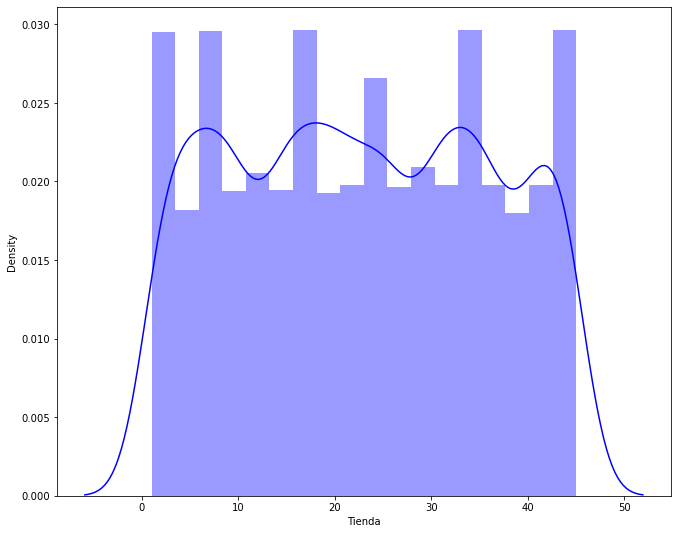

In [707]:
sns.distplot(df['Tienda'],color="blue")

La variable Ventas_Semana presenta una distribución aparentemente multimodal con un sesgo positivo.

<AxesSubplot:xlabel='Ventas_Semana', ylabel='Density'>

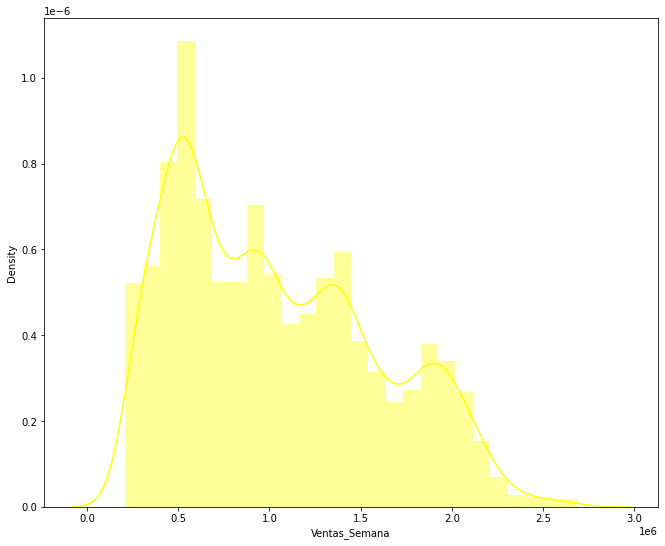

In [708]:
sns.distplot(df['Ventas_Semana'],color="yellow")

La variable Bandera_Vacaciones presenta únicamente 2 valores, con una mayor concentración en el valor "0".

<AxesSubplot:xlabel='Bandera_Vacaciones', ylabel='Density'>

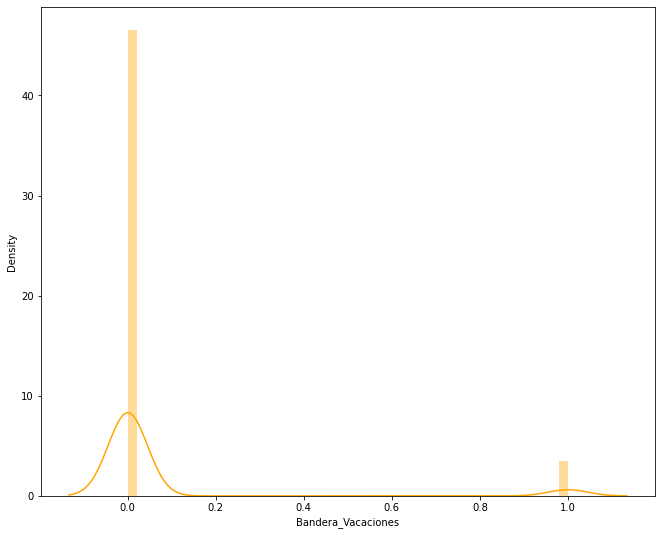

In [709]:
sns.distplot(df['Bandera_Vacaciones'],color="orange")

La variable Temperatura es una distribución Normal con un leve sesgo negativo.

<AxesSubplot:xlabel='Temperatura', ylabel='Density'>

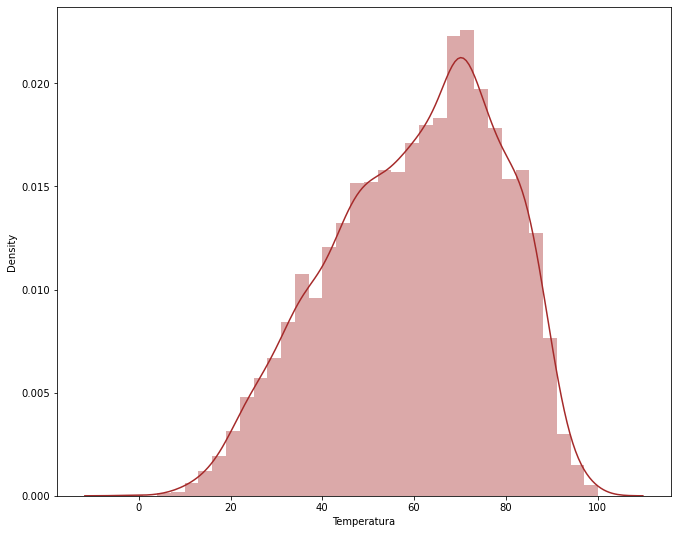

In [710]:
sns.distplot(df['Temperatura'],color="brown")

La variable precio_combustible no es una distribución Normal y no presenta sesgos pronunciados.

<AxesSubplot:xlabel='precio_combustible', ylabel='Density'>

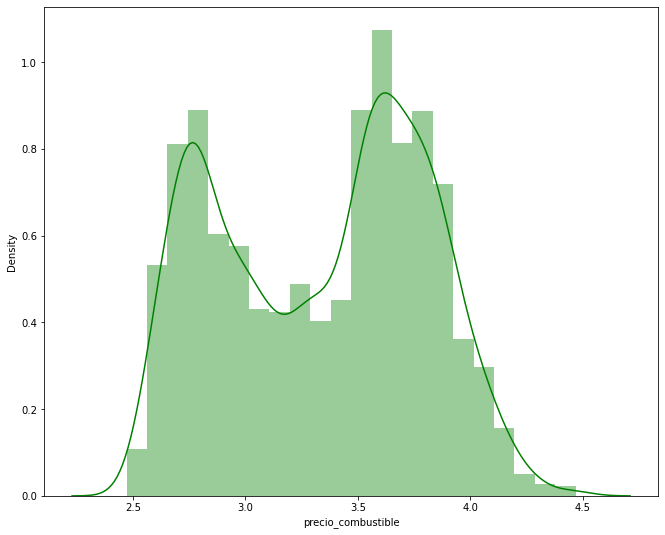

In [711]:
sns.distplot(df['precio_combustible'],color="green")

La variable IPC no es una distribución Normal y no presenta sesgos pronunciados.

<AxesSubplot:xlabel='IPC', ylabel='Density'>

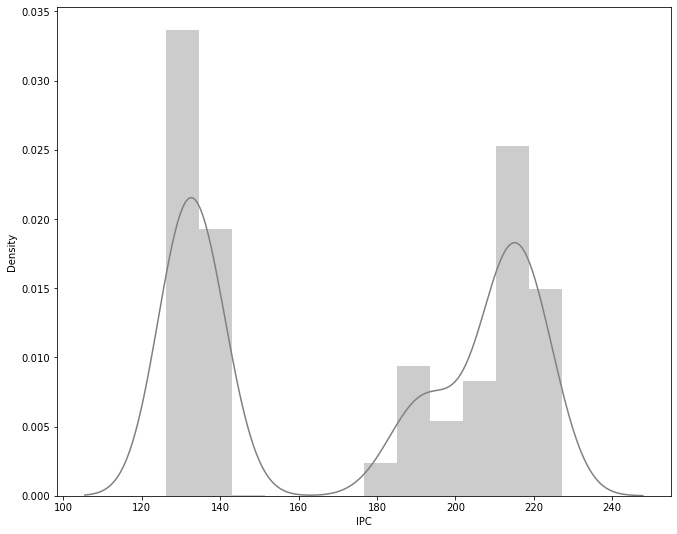

In [712]:
sns.distplot(df['IPC'],color="gray")

La variable Desempleo presenta una distribución casi Normal y no presenta sesgos pronunciados.

<AxesSubplot:xlabel='Desempleo', ylabel='Density'>

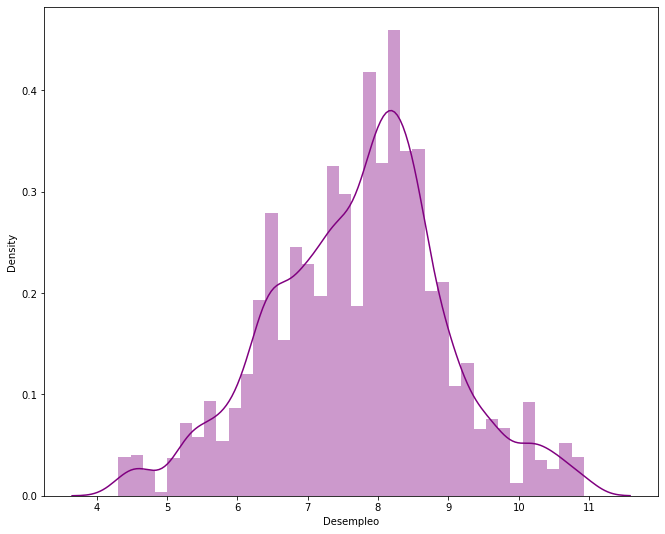

In [713]:
sns.distplot(df['Desempleo'],color="purple")

**6. Obtenga las correlaciones entre los datos de corte numérico.**

Con el objetivo de poder observar los distintos niveles de relación de las variables estudiadas se procede a realizar el análisis de correlación entre variables de carácter numérico. 

In [714]:
df.corr()

,Tienda,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo
Tienda,1.000000,-0.319128,0.004353,-0.026186,0.047717,-0.208596,0.309445
Ventas_Semana,-0.319128,1.000000,0.024442,-0.040918,0.019767,-0.082957,-0.073227
Bandera_Vacaciones,0.004353,0.024442,1.000000,-0.156403,-0.076429,-0.000364,0.011014
Temperatura,-0.026186,-0.040918,-0.156403,1.000000,0.145789,0.218164,0.023905
precio_combustible,0.047717,0.019767,-0.076429,0.145789,1.000000,-0.144272,-0.105187
IPC,-0.208596,-0.082957,-0.000364,0.218164,-0.144272,1.000000,-0.218764
Desempleo,0.309445,-0.073227,0.011014,0.023905,-0.105187,-0.218764,1.000000


En el caso de correlación positiva, el mayor valor se encuentra entre las variables: Tienda y Desempleo. Adicionalmente, existe una mayor correlación negativa entre las variables Tienda y Ventas_Semana.


Pero es importante mencionar que no existe una correlación positiva considerablemente alta entre las variables.

In [715]:
df.corr().style.background_gradient(cmap='coolwarm')

,Tienda,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo
Tienda,1.000000,-0.319128,0.004353,-0.026186,0.047717,-0.208596,0.309445
Ventas_Semana,-0.319128,1.000000,0.024442,-0.040918,0.019767,-0.082957,-0.073227
Bandera_Vacaciones,0.004353,0.024442,1.000000,-0.156403,-0.076429,-0.000364,0.011014
Temperatura,-0.026186,-0.040918,-0.156403,1.000000,0.145789,0.218164,0.023905
precio_combustible,0.047717,0.019767,-0.076429,0.145789,1.000000,-0.144272,-0.105187
IPC,-0.208596,-0.082957,-0.000364,0.218164,-0.144272,1.000000,-0.218764
Desempleo,0.309445,-0.073227,0.011014,0.023905,-0.105187,-0.218764,1.000000


**7. Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.**


Después de analizar el contexto del presente caso de estudio se procede a la identificación y designación de las variables de la base de datos de Walmart:

**Se selecciona como variable dependiente a:**
 - Ventas_Semana (Y)
 
**Mientras que las otras variables se analizan como variables independientes:***
 - Tienda (X1)
 - Bandera_Vacaciones (X2)
 - Temperatura (X3)
 - precio_combustible (X4)
 - IPC (X5)
 - Desempleo (X6)
 


In [716]:
df.describe()

,Tienda,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo
count,5920.000000,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000
mean,22.798142,1.039202e+06,0.069088,60.404422,3.340395,175.010815,7.722377
std,13.092635,5.518484e+05,0.253625,18.427013,0.458143,39.022611,1.243156
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,5.526404e+05,0.000000,46.965000,2.891000,132.766139,6.891000
50%,22.000000,9.469219e+05,0.000000,62.610000,3.418500,190.006988,7.852000
75%,34.000000,1.427444e+06,0.000000,74.722500,3.721000,213.793561,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


Todos los días festivos no están registrados en la base. Hay 4 tipos de días festivos como:

Super bowl: 12 de febrero de 2010, 11 de febrero de 2011, 10 de febrero de 2012, 8 de febrero de 2013\
Día del Trabajo: 10-sep-10, 9-sep-11, 7-sep-12, 6-sep-13\
Acción de Gracias: 26-nov-10, 25-nov-11, 23-nov-12, 29-nov-13\
Navidad: 31-dic-10, 30-dic-11, 28-dic-12, 27-dic-13
    
Para mirar las diferencias entre los días festivos y no festivos, creamos nuevas columnas de 4 tipos y rellenamos esto con valores tipo V/F Verdadero y Falso.


In [717]:

# Super bowl
df.loc[(df['Fecha'] == '2010-12-02')|(df['Fecha'] == '2011-11-02')|(df['Fecha'] == '2012-10-02'),'Super_Bowl'] = True
df.loc[(df['Fecha'] != '2010-12-02')&(df['Fecha'] != '2011-11-02')&(df['Fecha'] != '2012-10-02'),'Super_Bowl'] = False
# Día del trabajo
df.loc[(df['Fecha'] == '2010-10-09')|(df['Fecha'] == '2011-09-09')|(df['Fecha'] == '2012-07-09'),'Dia_Trabajo'] = True
df.loc[(df['Fecha'] != '2010-10-09')&(df['Fecha'] != '2011-09-09')&(df['Fecha'] != '2012-07-09'),'Dia_Trabajo'] = False
# Acción de gracias
df.loc[(df['Fecha'] == '2010-11-26')|(df['Fecha'] == '2011-11-25'),'Accion_Gracias'] = True
df.loc[(df['Fecha'] != '2010-11-26')&(df['Fecha'] != '2011-11-25'),'Accion_Gracias'] = False
# Navidad
df.loc[(df['Fecha'] == '2010-12-31')|(df['Fecha'] == '2011-12-30'),'Navidad'] = True
df.loc[(df['Fecha'] != '2010-12-31')&(df['Fecha'] != '2011-12-30'),'Navidad'] = False

<AxesSubplot:xlabel='Super_Bowl', ylabel='Ventas_Semana'>

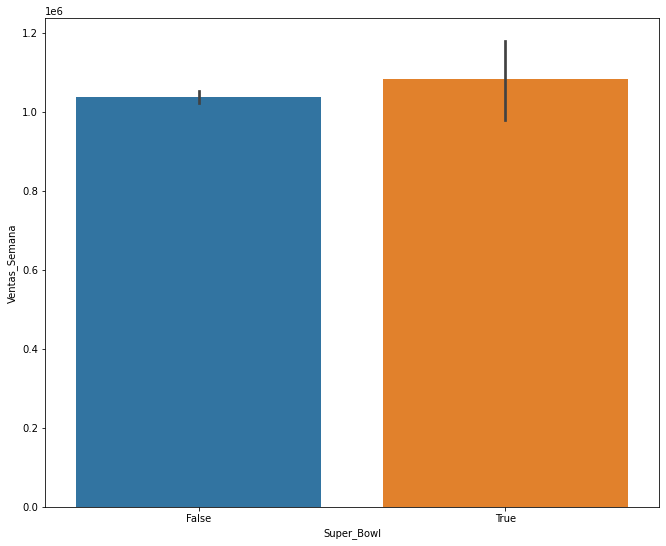

In [718]:
sns.barplot(x='Super_Bowl', y='Ventas_Semana', data=df) # Super Bowl

<AxesSubplot:xlabel='Dia_Trabajo', ylabel='Ventas_Semana'>

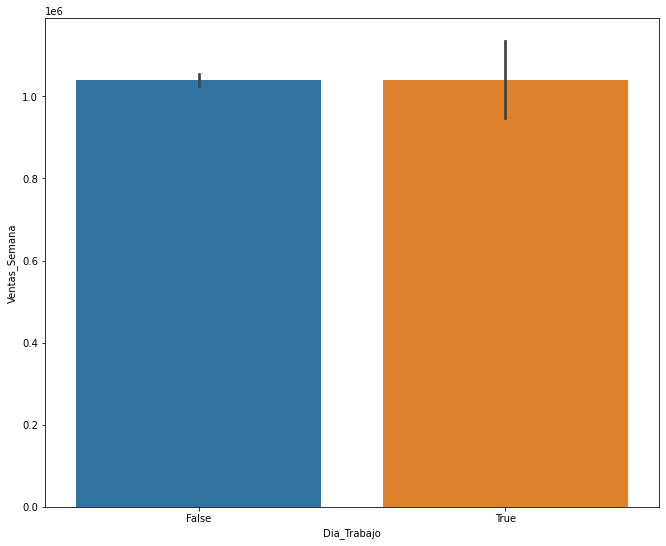

In [719]:
sns.barplot(x='Dia_Trabajo', y='Ventas_Semana', data=df) # Día del trabajo

<AxesSubplot:xlabel='Accion_Gracias', ylabel='Ventas_Semana'>

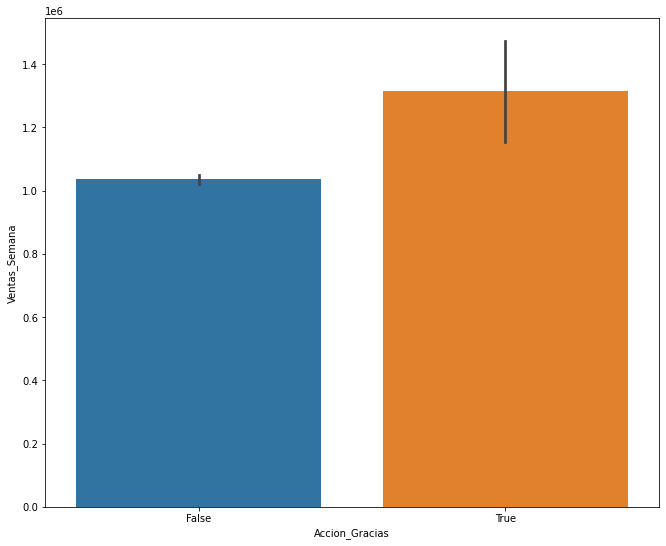

In [720]:
sns.barplot(x='Accion_Gracias', y='Ventas_Semana', data=df) # Accion_gracias

<AxesSubplot:xlabel='Navidad', ylabel='Ventas_Semana'>

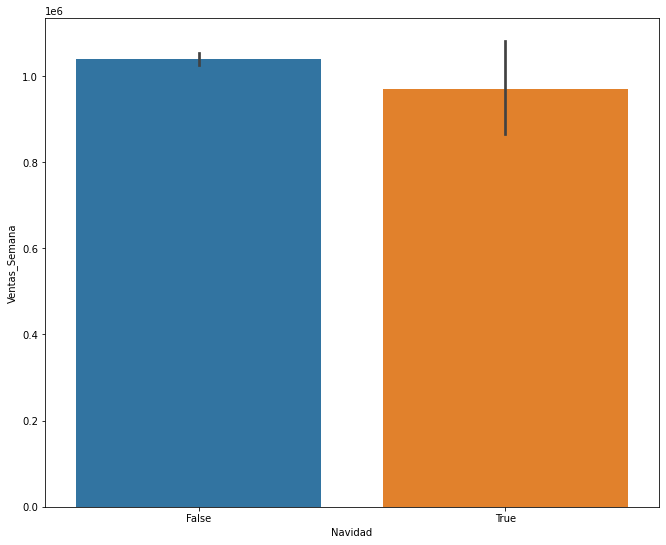

In [721]:
sns.barplot(x='Navidad', y='Ventas_Semana', data=df) # Navidad

De acuerdo a este análisis, las ventas en los días festivos no incrementan considerablemente respecto a los días no festivos. Las ventas incrementan en el día Super Bowl, pero el mayor incremento se encuentra en el día de Acción de Gracias.

In [722]:
df.describe()

,Tienda,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo
count,5920.000000,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000
mean,22.798142,1.039202e+06,0.069088,60.404422,3.340395,175.010815,7.722377
std,13.092635,5.518484e+05,0.253625,18.427013,0.458143,39.022611,1.243156
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,5.526404e+05,0.000000,46.965000,2.891000,132.766139,6.891000
50%,22.000000,9.469219e+05,0.000000,62.610000,3.418500,190.006988,7.852000
75%,34.000000,1.427444e+06,0.000000,74.722500,3.721000,213.793561,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


**8. Indique que tipo de modelación realizarán y porqué.**

- Para este caso se utiliza el modelo de regresión lineal, ya que tenemos una variable dependiente (ventas_semana) que nos permitirá predecir su comportamiento a partir de las variables independientes.

- Se selecciona como variable dependiente a Ventas_Semana porque en un contexto real las ventas cambian de acuerdo a los diferentes factores. Además, a partir de análisis anteriores se ha podido observar que la variable Ventas_Semana presenta distintos niveles de correlación con las demás variables analizadas.

- Adicionalmente, se intenta ejecutar el modelo de series temporales, pero el modelo presenta algunos errores por lo cual no se incorpora en este análisis.

Se aplican logaritmos a la variable dependiente.

In [723]:
log_Ventas_Semana=np.log(df.Ventas_Semana)
df['log_Ventas_Semana']=log_Ventas_Semana

Se incluyen todas las variables para evaluar si son significativas o no, a continuación se recodifica las variables cualitativas de forma numérica para que el modelo de regresión pueda cuantificar su incidencia en la variable dependiente de mejor manera.


- Para ello, se sigue un proceso para dumificar las variables categóricas con la ayuda del module de pandas. 

In [724]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [725]:
df[var_cualitativas]

,Super_Bowl,Dia_Trabajo,Accion_Gracias,Navidad
0,False,False,False,False
1,True,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6430,False,False,False,False
6431,False,False,False,False
6432,False,False,False,False
6433,False,False,False,False


In [726]:
df.loc[:,var_cualitativas]=df[var_cualitativas].replace(to_replace = [False,True],value = [0,1])
df

,Tienda,Fecha,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo,Super_Bowl,Dia_Trabajo,Accion_Gracias,Navidad,log_Ventas_Semana
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,0,14.312455
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,1,0,0,0,14.311400
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,0,14.292966
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,0,14.158907
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,0,14.256862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,0,0,0,13.477481
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,0,0,0,0,13.505522
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,0,0,0,13.506897
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,0,0,0,13.484400


In [727]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [728]:
df[var_cualitativas]

""
0
1
2
3
4
...
6430
6431
6432
6433


Una vez que tenemos nuestra base de datos en el estado deseado para la modelación, procedemos a incluir todas las variables. En la práctica se debería incluir aquellas que tengan mayor asociación lineal.

In [729]:
regresion = ols("log_Ventas_Semana ~ Tienda + Bandera_Vacaciones + Temperatura + precio_combustible + IPC + Desempleo", data=df)
results = regresion.fit()

In [730]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      log_Ventas_Semana   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     108.7
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          2.00e-130
Time:                        23:21:36   Log-Likelihood:                -4926.1
No. Observations:                5920   AIC:                             9866.
Df Residuals:                    5913   BIC:                             9913.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.1937      0

- El modelo fue obtenido bajo 5.920 datos.
- Tiene un grado de ajuste de del 9,9%.
- Tomando en cuenta el valor P se observa que las variables significativas son Tienda, Temperatura, precio_combustible, IPC y Desempleo, ya que tienen un valor p inferiores a 0.05.
- La variable no significativa es la variable Bandera_Vacaciones ya que tiene un valor p superior a 0.05. De hecho el valor p de estas variables se encuentra alrededor de 0.3.

**9. Verifique los supuestos, de haber escogido el enfoque econométrico.**

Se procede a verificar los supuestos de la Regresión Lineal:

**Multicolinearidad**

In [731]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df2=df[df.columns.difference(['Ventas_Semana', 'log_Ventas_Semana', 'Fecha', 'Accion_Gracias', 'Navidad', 'Dia_Trabajo', 'Super_Bowl' ])]
df2

,Bandera_Vacaciones,Desempleo,IPC,Temperatura,Tienda,precio_combustible
0,0,8.106,211.096358,42.31,1,2.572
1,1,8.106,211.242170,38.51,1,2.548
2,0,8.106,211.289143,39.93,1,2.514
3,0,8.106,211.319643,46.63,1,2.561
4,0,8.106,211.350143,46.50,1,2.625
...,...,...,...,...,...,...
6430,0,8.684,192.013558,64.88,45,3.997
6431,0,8.667,192.170412,64.89,45,3.985
6432,0,8.667,192.327265,54.47,45,4.000
6433,0,8.667,192.330854,56.47,45,3.969


In [732]:
df2.dtypes

Bandera_Vacaciones      int64
Desempleo             float64
IPC                   float64
Temperatura           float64
Tienda                  int64
precio_combustible    float64
dtype: object

Ahora se calcula el VIF:

In [733]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

              feature        VIF
0  Bandera_Vacaciones   1.099848
1           Desempleo  27.337612
2                 IPC  17.020867
3         Temperatura  13.200532
4              Tienda   4.581550
5  precio_combustible  29.317249


Si el VIF es >5, la correlación es potencialmente severa entre las variables analizadas, por lo que las estimaciones no sean muy confiables.

Por lo tanto, se presentan 4 variables que potencialmente serían un problema. La forma de corregir al VIF es eliminar una por una las variables que muestran multicolinearidad hasta permanecer en los rangos aceptados (comenzando desde el mayor VIF).

Se aplica nuevamente el VIF habiendo removido las variables de precio_combustible, IPC y Desempleo.

In [734]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df2=df[df.columns.difference(['Ventas_Semana', 'log_Ventas_Semana', 'Fecha', 'Accion_Gracias', 'Navidad', 'Dia_Trabajo', 'Super_Bowl', 'precio_combustible', 'Desempleo', 'IPC'])]
df2

,Bandera_Vacaciones,Temperatura,Tienda
0,0,42.31,1
1,1,38.51,1
2,0,39.93,1
3,0,46.63,1
4,0,46.50,1
...,...,...,...
6430,0,64.88,45
6431,0,64.89,45
6432,0,54.47,45
6433,0,56.47,45


In [735]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]

print(vif_data)

              feature       VIF
0  Bandera_Vacaciones  1.056938
1         Temperatura  3.144956
2              Tienda  3.177852


In [736]:
regresion_2 = ols("log_Ventas_Semana ~ Tienda + Bandera_Vacaciones + Temperatura", data=df2)
results_2 = regresion_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:      log_Ventas_Semana   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          7.61e-108
Time:                        23:21:37   Log-Likelihood:                -4986.1
No. Observations:                5920   AIC:                             9980.
Df Residuals:                    5916   BIC:                         1.001e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.1393      0

In [737]:
# Creamos el dataframe del VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df2.columns.difference(['precio_combustible', 'Desempleo', 'IPC'])
  
# Calculamos el VIF por c/variable
vif_data["VIF"] = [variance_inflation_factor(df2[df2.columns.difference(['precio_combustible', 'Desempleo', 'IPC'])].values, i) \
                   for i in range(len(df2[df2.columns.difference(['precio_combustible', 'Desempleo', 'IPC'])].columns))]

print(vif_data)

              feature       VIF
0  Bandera_Vacaciones  1.056938
1         Temperatura  3.144956
2              Tienda  3.177852


**Normalidad en los residuos**

Para la normalidad en los residuos del modelo, compararemos mediante los gráficos QQ (o gráfico de cuantiles-cuantiles)si los puntos del gráfico forman aproximadamente una línea diagonal recta.

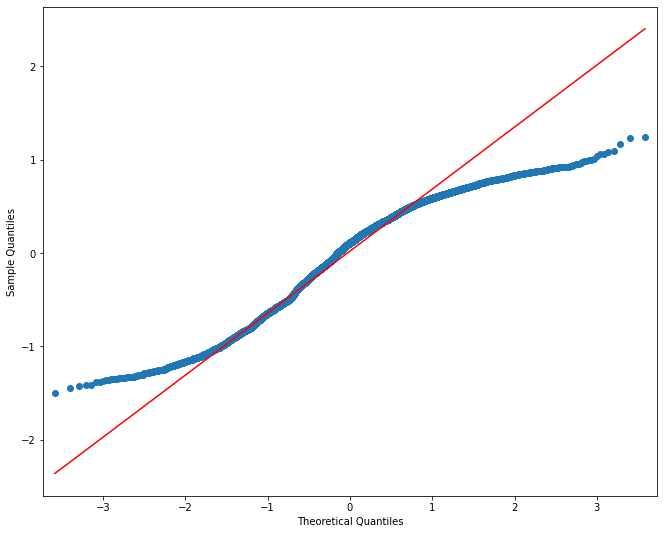

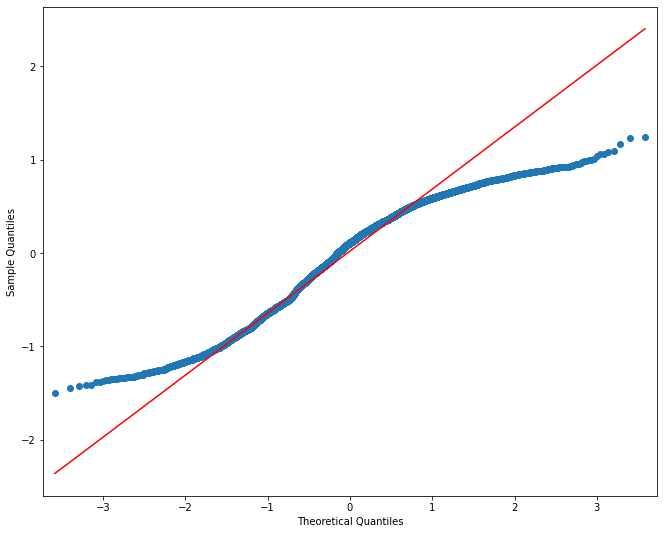

In [738]:
sm.qqplot(results_2.resid, line='q')

Se procede a aplicar una prueba estadística de Jarque Bera:

In [739]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [740]:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results_2.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 355.1939879609608),
 ('Chi^2 two-tail prob.', 7.423445281414415e-78),
 ('Skew', -0.45889447691114127),
 ('Kurtosis', 2.2269288110978653)]

La prueba de Jarque-Bera es siempre un número positivo y cuanto más alejado de cero esté, habrá más evidencia de que los datos de la muestra no siguen una distribución normal.

Considerando que la Kurtosis es 2.22 y la prueba de Jarque_bera es alta 355.19 se tiene evidencia de que los residuos no siguen una distribución normal.

Finalmemte, podemos contrastar si la media de los residuos de este modelo es 0, o muy cercano a este. Para esto podemos extraer los residuos del modelo y calcular la media directamente:

In [741]:
results_2.resid.mean()

-2.384278960451755e-15

La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

**Homocedasticidad en los residuos**

In [742]:
y_pred=results_2.predict()

Text(0.5, 1.0, 'Gráfica de residuos')

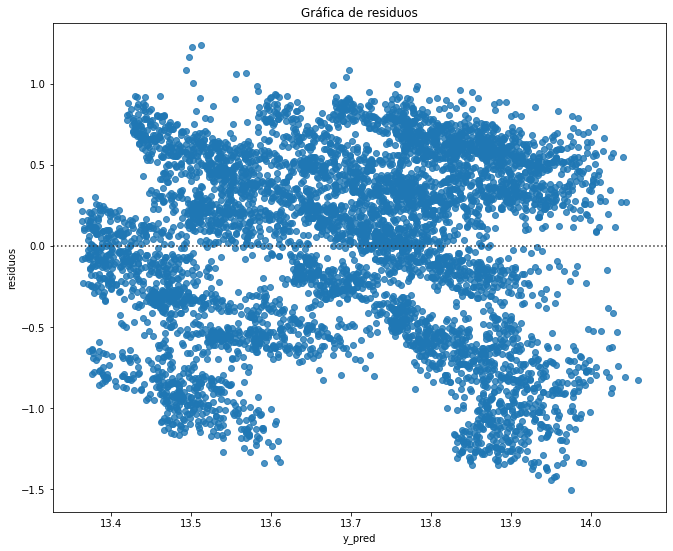

In [743]:
sns.residplot(y_pred, results_2.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

In [744]:
nombres = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
breuschpagan = sms.het_breuschpagan(results_2.resid, results.model.exog)
lzip(nombres, breuschpagan)

[('Lagrange multiplier statistic', 409.9618313320477),
 ('p-value', 2.0162929881981104e-85),
 ('f-value', 73.32388132538182),
 ('f p-value', 1.5143542466394367e-88)]

El estadistico de Lagrange para la prueba es de 409.96 y el valor p correspondiente es menor a 0.05, se puede rechazar la hipótesis nula, y concluir que no hay evidencia suficiente para decir que la heterocedasticidad no está presente en el modelo de regresión. Por lo tanto se conluye que no existe homocedasticidad de los residuos.

**10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.**

$$ log ventas semana = 14.1393 + 0.0163  \times  Bandera_Vacaciones - 0.0122 \times Tienda - 0.0027 \times Temperatura $$

Este sería el modelo de regresión definitivo, ya que el valor de R cuadrado del modelo es del 0.081 y se considera un intercepto de la variable dependiente (y) ventas de 14.1393.

In [745]:
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:      log_Ventas_Semana   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 26 Dec 2022   Prob (F-statistic):          7.61e-108
Time:                        23:21:37   Log-Likelihood:                -4986.1
No. Observations:                5920   AIC:                             9980.
Df Residuals:                    5916   BIC:                         1.001e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.1393      0

En base a los coeficientes del modelo se puede observar que la variable Bandera_Vacaciones tiene una relación lineal positiva con la variable de salida; en cambio las variables Tienda y Temperatura presentan una relación lineal negativa tomando en cuenta que según el modelo todas las variables son significativas y se las debe considerar.

**11. Grafique a los valores predicho de modelo vs los valores reales.**

Estos serían los datos del modelo teórico:

In [746]:
y_pred = results_2.predict(df2)
y_pred

0       14.010929
1       14.037672
2       14.017463
3       13.999070
4       13.999427
          ...    
6430    13.411621
6431    13.411593
6432    13.440198
6433    13.434708
6434    13.428174
Length: 5920, dtype: float64

## Gráfico de valores predichos vs datos reales:

<AxesSubplot:xlabel='Temperatura', ylabel='log_Ventas_Semana'>

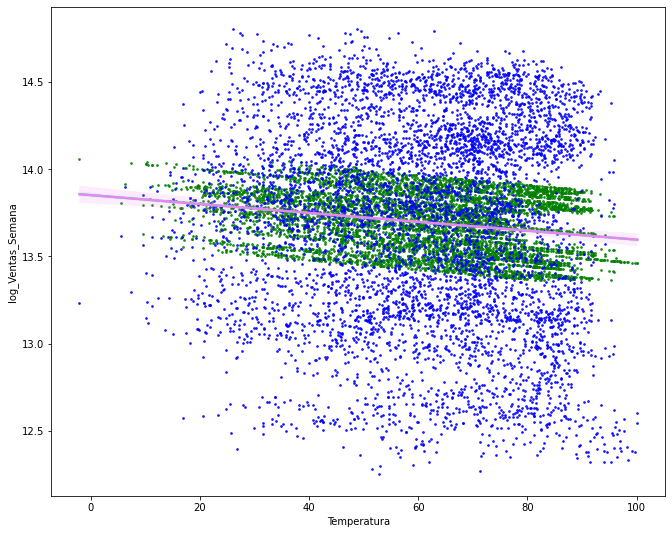

In [747]:
# Valores predichos:
sns.regplot(x=df["Temperatura"], y=y_pred, scatter_kws={"color": "green", "s": 3},
                line_kws={"color": "turquoise"})
# Valores observados:
sns.regplot(x=df["Temperatura"], y=df['log_Ventas_Semana'], scatter_kws={"color": "blue", "s": 3},
                line_kws={"color": "violet"})


Debido al resultado de R cuadrado tan bajo 0.081 del modelo analizado, la tendencia del gráfico no es tan predecible.

Por temas de validación se procede a realizar un análisis adicional, bajo el enfoque de Machine Learning:

###### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# ENFOQUE MACHINE LEARNING:

**1. Importe la base de datos (Walmart.csv) en Jupyter Notebook.**

Importamos los módulos requeridos:

In [779]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Para la regresión y validación de supuestos llamamos a sklearn, el módulo encargado de la modelación por Machine Learning en Python.

Ahora, llamemos a nuestra base de datos a nuestro espacio en el Jupyer Notebook:

In [780]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**Renombrar las variables:**

Para mejor comprensión de las variables se procede a renombrar las variables:

In [781]:
df.rename({'Store':'Tienda', 'Date': 'Fecha', 'Weekly_Sales':'Ventas_Semana', 
           'Holiday_Flag': 'Bandera_Vacaciones', 'Temperature': 'Temperatura', 'Fuel_Price': 'precio_combustible', 'CPI':'IPC', 'Unemployment':'Desempleo'}, axis=1, inplace=True)
df.head()

,Tienda,Fecha,Ventas_Semana,Bandera_Vacaciones,Temperatura,precio_combustible,IPC,Desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Listo, una vez tenemos en nuestro espacio de trabajo a nuestra base de datos, debemos:

- Inicializar el modelo
- Entrenar el modelo con los datos de entrenamiento
- Hacer predicciones

#### 1. Inicializar el modelo

In [782]:
from sklearn.linear_model import LinearRegression

Antes de realizar nuestra división, dejemos a nuestra base de datos en el estado deseado. Para ello, lo primero que vamos a hacer es separar nuestra variable objetivo de los predictores y recodificar aquellas variables categóricas que no se encuentren dummificadas:

Recodificamos las variables categóricas con Label Encoder

In [783]:
var_cuantitativas = df.select_dtypes('number').columns
var_cualitativas  =df.select_dtypes('object').columns

In [784]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

df[var_cualitativas] = df[var_cualitativas].apply(labelencoder.fit_transform)

**2. Escoja su variable objetivo y las variables independientes considerando un enfoque de regresión lineal.**

Separamos a los predictores de nuestra variable objetivo:

In [785]:
X = df[df.columns.difference(['Ventas_Semana'])]
y = df.Ventas_Semana

Como nuestra base de datos no contine la variable tiempo, podemos realizar un train/split aleatorio de la siguiente forma:

Importamos del module sklearn la función: train_test_split

In [786]:
from sklearn.model_selection import train_test_split

**3. Realice un train/test split, separando un 90% de los datos para la submuestra de entrenamiento y 10% para la submuestra de prueba.**

Dividimos en dos partes a nuestra base de datos en un 90% para que el algoritmo entrene y un 10% para aplicar nuestras métricas de desempeño.

In [787]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =123)

In [788]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(5791, 7)  <class 'pandas.core.frame.DataFrame'>
(5791,) 	  <class 'pandas.core.series.Series'>
(644, 7)  <class 'pandas.core.frame.DataFrame'>
(644,) 	  <class 'pandas.core.series.Series'>


**4. Entrene al modelo de regresión lineal por sklearn.**

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

In [789]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)


LinearRegression()

In [790]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

**5. Evalúe su modelo. ¿Es este aceptable?, para ello escoja las métricas correspondientes.**

**Métricas de evaluación**

In [791]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**MSE**

In [792]:
MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

273818828368.9715
268792173062.1579


**RMSE**

In [793]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

523277.0092111553
518451.70755062415


**MAE**

In [794]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

430276.9409663293
427167.4886537875


**R^2**

In [795]:
from sklearn.metrics import r2_score

In [796]:
r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train)
print('El R^2 del subconjunto de prueba es:' , r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.1427554474366871
El R^2 del subconjunto de prueba es: 0.13228920983045545


In [797]:
# Print the Intercept:
print('intercepto:', modelo_regresion.intercept_)

# Print the Slope:
print('pendiente:', modelo_regresion.coef_) 

intercepto: 2013147.1906412304
pendiente: [ 62938.74400942 -21367.25422651   -250.00374939  -2337.65102967
   -949.50524181 -15538.64205727  10178.93406642]


**El modelo No es Aceptable**, ya que de acuerdo a las tres métricas para evaluar las predicciones se obtienen los siguientes resultados:
- El Error cuadrático medio (MSE): la diferencia entre los valores de entrenamiento (273818828368.9715) y los de prueba (268792173062.1579) es significativa.
- El Error cuadrático medio (RMSE): la diferencia entre los valores de entrenamiento (523277.0092111553) y los de prueba (518451.70755062415) es considerable.
- El Error absoluto medio (MAE): la diferencia entre los valores de entrenamiento (430276.9409663293) y los de prueba (427167.4886537875) es considerable.


**6. Compare sus predicciones con los datos reales mediante un gráfico.**

#### Predicciones en el subgrupo de datos de entrenamiento

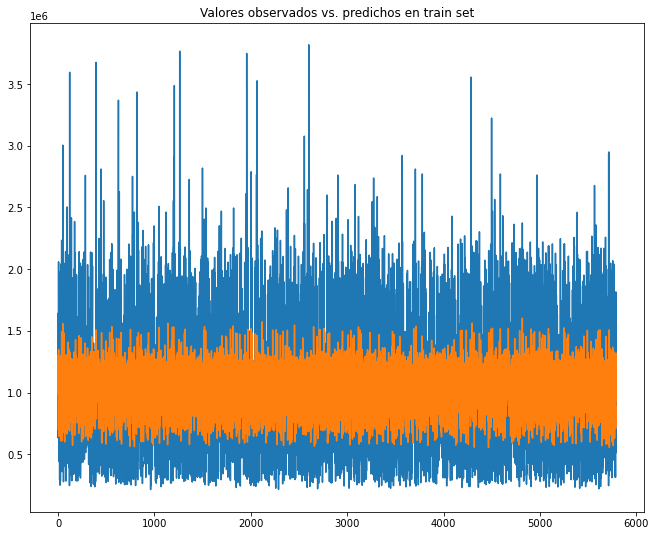

In [798]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones en el subgrupo de datos de prueba

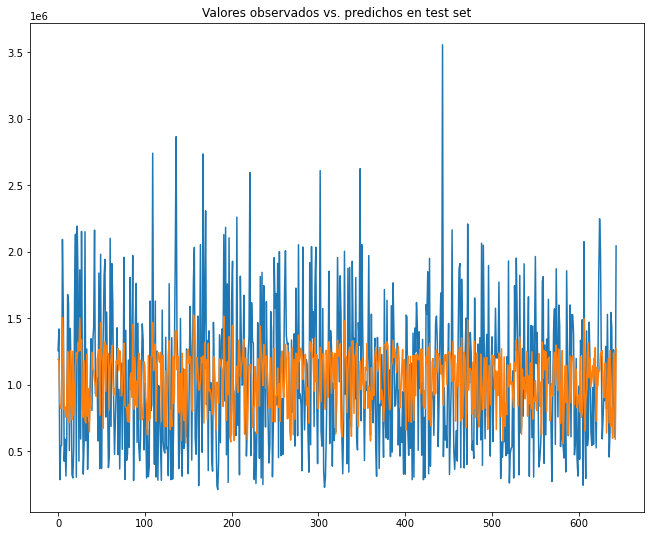

In [799]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set");

**7. Identifique a las dos variables con mayor poder explicativo en el modelo ¿Cómo las identificó?**

Requerimos normalizar las variables explicativas porque en un análisis de feature importance si lo obviamos, el modelo difícilmente captará la contribución de las variables de menor escala, incluso si son fuertes. Para ello, usaremos la función StandardScaler del module de sklearn.

In [800]:
from sklearn.preprocessing import StandardScaler

In [801]:
sc = StandardScaler()

In [802]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Entrenar el modelo con los datos de entrenamiento

Una vez tenemos nuestros diferentes conjuntos de datos, procedemos a entrenar al modelo:

In [803]:
modelo_regresion_std = LinearRegression()
modelo_regresion_std.fit(X_train_std, y_train)

LinearRegression()

### Realizar las predicciones

In [804]:
predicciones_train_std = modelo_regresion_std.predict(X_train_std)
predicciones_test_std = modelo_regresion_std.predict(X_test_std)

#### R^2

In [805]:
r_square_train_std = r2_score(y_train, predicciones_train_std)
r_square_test_std  = r2_score(y_test, predicciones_test_std)
print('El R^2 del subconjunto de entrenamiento es:' , r_square_train_std)
print('El R^2 del subconjunto de prueba es:' , r_square_test_std)

El R^2 del subconjunto de entrenamiento es: 0.14275544743668733
El R^2 del subconjunto de prueba es: 0.13228920983045556


#### Predicciones es el subgrupo de datos de entrenamiento

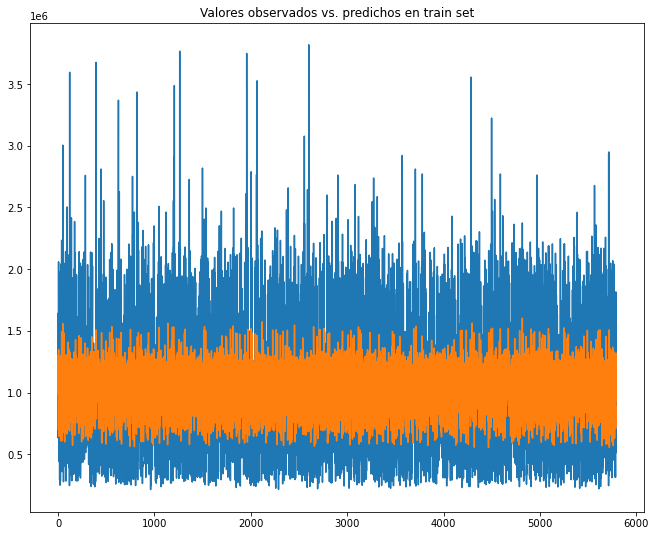

In [806]:
fig, ax = plt.subplots()
ax.plot(y_train.values)
ax.plot(predicciones_train_std)
plt.title("Valores observados vs. predichos en train set");

#### Predicciones es el subgrupo de datos de prueba

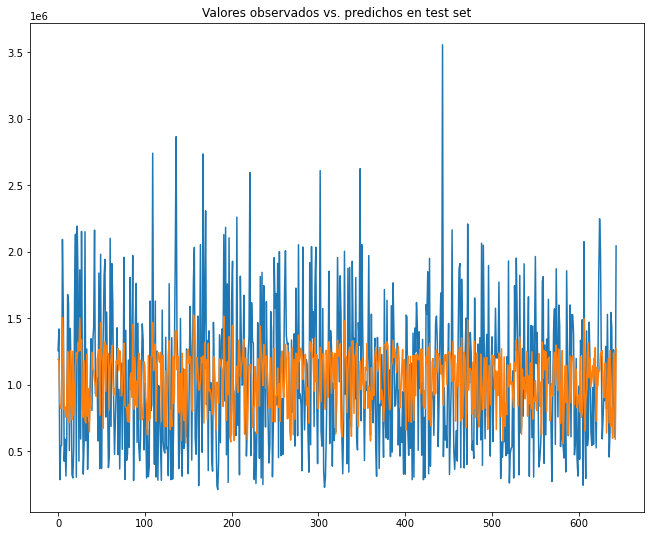

In [807]:
fig, ax = plt.subplots()
ax.plot(y_test.values)
ax.plot(predicciones_test_std)
plt.title("Valores observados vs. predichos en test set");

### Extraer los coeficientes

In [808]:
importancia = modelo_regresion_std.coef_

In [809]:
# Resumen
for i,v in enumerate(importancia):
    print('Variable explicativa No. %0d, Score: %.5f' % (i,v))

Variable explicativa No. 0, Score: 16088.45119
Variable explicativa No. 1, Score: -40064.31605
Variable explicativa No. 2, Score: -10311.06805
Variable explicativa No. 3, Score: -92029.45092
Variable explicativa No. 4, Score: -17523.82663
Variable explicativa No. 5, Score: -201935.18218
Variable explicativa No. 6, Score: 4654.65729


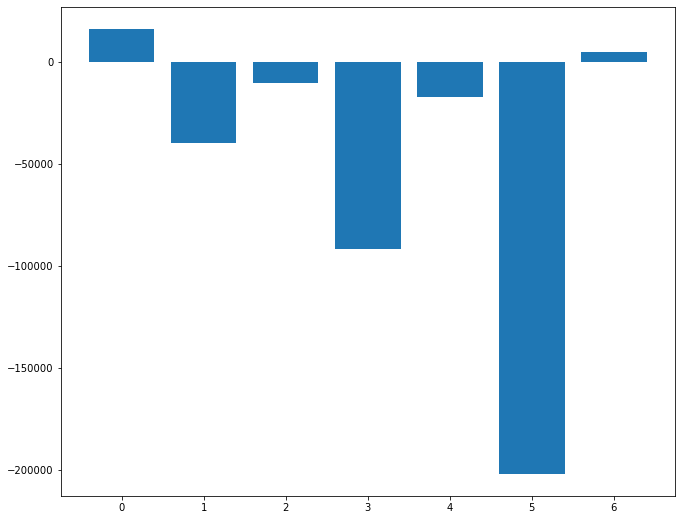

In [810]:
# Graficar la importancia o "feature importance"
plt.bar([x for x in range(len(importancia))], importancia)
plt.show()

De acuerdo al gráfico precedente, las variables con mayor poder explicativo son:

Variable explicativa No.0 con 16088.45119 y No. 6 con 4654.65729